In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
engine.table_names()

# from sqlalchemy import inspect
# inspector = inspect(engine)
# print(inspector.get_table_names())
# print(inspector.get_columns('measurement'))

#https://stackoverflow.com/questions/48770284/how-do-i-print-all-columns-in-a-sqlalchemy-query
Measurement.__table__.columns.values()

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [11]:
Station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#  First find the last day of data that is in the database
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_day

('2017-08-23')

In [13]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=366)
year_ago
#dt.timedelta?

datetime.date(2016, 8, 22)

In [14]:
# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).order_by(Measurement.date).all()

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip)
precip_df.set_index('date', inplace=True)
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [16]:
# Sort the dataframe by date
precip_df.sort_values(by=['date'])
precip_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15


In [36]:
#precip_df

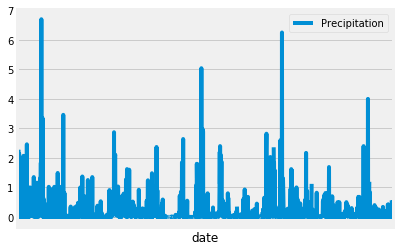

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.xticks([], [])
# https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
plt.legend(['Precipitation'])
plt.savefig("Images/th_precipitation.png")
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [20]:
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
clean_precip_df = precip_df.dropna()
clean_precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset? [(9)]
stations = session.query(Station.station).count()
print(f"There are {stations} stations in Hawaii according to this dataset")

There are 9 stations in Hawaii according to this dataset


In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temps = session.query(Measurement.station, func.min(Measurement.tobs),
                func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()
   
print(temps)


[('USC00519281', 54.0, 85.0, 71.66378066378067)]


In [25]:
session.query(func.min(Measurement.tobs),
                func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempslast12 = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date > year_ago).\
            filter(Measurement.station == 'USC00519281').all()

tempslast12_df = pd.DataFrame(tempslast12)

tempslast12_df.head()

# Perform a query to retrieve the data and precipitation scores
# precip = session.query(Measurement.date, Measurement.prcp).\
#     filter(Measurement.date > year_ago).order_by(Measurement.date).all()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


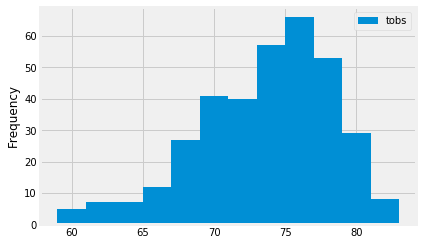

In [27]:
tempslast12_df.plot.hist(bins=12)
plt.savefig("Images/th_station-histogram.png")
plt.show()

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [29]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# Not given a date for the trip - selection randomly will not produce same data as given in the smaple.
#  Choosing 2017-01-16 to 2017-01-30 for my trip dates.   Note DB runs 1/1/2010 to 8/23/2017.
trip_temps = calc_temps('2017-01-16', '2017-01-30')
print(trip_temps)
print(trip_temps[0][1])

[(63.0, 70.86315789473684, 80.0)]
70.86315789473684


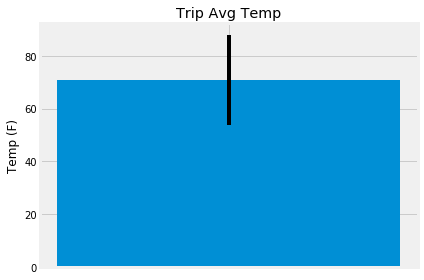

In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x = range(len(trip_temps))
plt.bar(x,trip_temps[0][1], yerr = trip_temps[0][2]-trip_temps[0][0], tick_label="")
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.savefig("Images/th_temperature.png")
plt.show()

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# NOTE to self - joins w/ SQLAlchemy - https://stackoverflow.com/questions/6044309/sqlalchemy-how-to-join-several-tables-by-one-query
year_ago_start = dt.date(2017, 1, 16) - dt.timedelta(days=365)
year_ago_end = dt.date(2017, 1,30) - dt.timedelta(days=365)

# ttl_rain = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude,\
#             Station.elevation, func.sum(Measurement.prcp)).\
#             filter(Measurement.date >= year_ago_start).\
#             filter(Measurement.date <= year_ago_end).\
#             group_by(Measurement.station).\
#             order_by(func.sum(Measurement.prcp).desc()).all()
# ttl_rain = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude,\
#             Station.elevation, func.sum(Measurement.prcp)).\
#             filter(Measurement.date >= year_ago_start).\
#             filter(Measurement.date <= year_ago_end).\
#             filter(Measurement.station == Station.station).\
#             group_by(Measurement.station).\
#             order_by(func.sum(Measurement.prcp).desc()).all()
# print(ttl_rain)
#ttl_rain

sel = [Measurement.station, Station.name, Station.latitude, Station.longitude,\
            Station.elevation, func.sum(Measurement.prcp)]
ttl_rain = session.query(*sel).filter(Measurement.station == Station.station).\
                        filter(Measurement.date >= year_ago_start).\
                        filter(Measurement.date <= year_ago_end).\
                        group_by(Measurement.station).\
                        order_by(func.sum(Measurement.prcp).desc()).all()
print(ttl_rain)

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.3), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.64), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.63), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.61), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.42000000000000004), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.21000000000000002), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]


## Optional Challenge Assignment

In [32]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [33]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []

# Set the start and end date of the trip
#  As above, chose 2017-01-16 to 2017-01-30 for my trip dates.   Note DB runs 1/1/2010 to 8/23/2017.
trip_start = dt.date(2017, 1, 16)
trip_end = dt.date(2017, 1, 30)

# Use the start and end date to create a range of dates
#   See https://stackoverflow.com/questions/993358/creating-a-range-of-dates-in-python
date_range = pd.date_range(trip_start, trip_end)

# Stip off the year and save a list of %m-%d strings
dates_noyr = date_range.strftime('%m-%d')

# Loop through the list of %m-%d strings and calculate the normals for each date
for trip_day in dates_noyr:
    normals.append(*daily_normals(trip_day))

In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns = ['tmin','tavg', 'tmax'])
normals_df['date'] = date_range
normals_df = normals_df.set_index('date')
normals_df


,tmin,tavg,tmax
date,,,
2017-01-16,54.0,68.629630,80.0
2017-01-17,61.0,69.074074,76.0
2017-01-18,57.0,68.631579,77.0
2017-01-19,60.0,68.263158,78.0
2017-01-20,61.0,68.866667,78.0
2017-01-21,61.0,70.145455,76.0
2017-01-22,60.0,69.264151,76.0
2017-01-23,57.0,69.509091,79.0
2017-01-24,58.0,68.762712,78.0


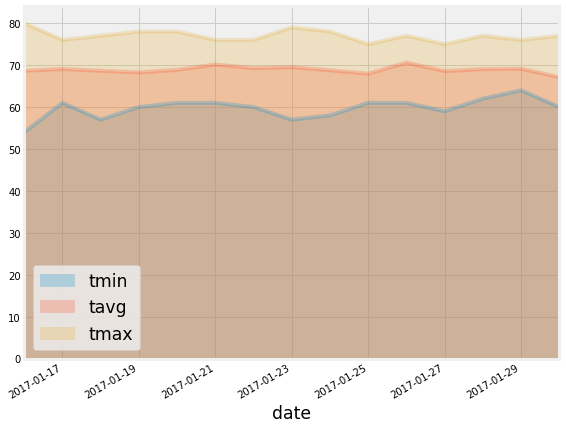

In [35]:
# Plot the daily normals as an area plot with `stacked=False`
# - x lables real pain, x_compat is key, see:  https://pandas-docs.github.io/pandas-docs-travis/user_guide/visualization.html
normals_df.plot.area(stacked=False, rot=30, alpha=.25, x_compat=True, figsize=(8, 6))
plt.tight_layout()
#plt.rc('axes', titlesize="xx-large")
plt.xlabel('date', fontsize='xx-large')
plt.legend(fontsize='xx-large')
plt.savefig("Images/th_daily_normals.png")
plt.show()

In [227]:
normals_df.dtypes


tmin    float64
tavg    float64
tmax    float64
dtype: object

In [228]:
normals_df.index


DatetimeIndex(['2017-01-16', '2017-01-17', '2017-01-18', '2017-01-19',
               '2017-01-20', '2017-01-21', '2017-01-22', '2017-01-23',
               '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27',
               '2017-01-28', '2017-01-29', '2017-01-30'],
              dtype='datetime64[ns]', name='date', freq=None)